<a href="https://colab.research.google.com/github/KW-ML/ML_Project/blob/main/LightGBM_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_low = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_low.csv", encoding = 'utf-8-sig')
test_low =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/test_low.csv", encoding = 'utf-8-sig')
train_high= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_high.csv", encoding = 'utf-8-sig')
test_high= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/test_high.csv", encoding = 'utf-8-sig')

In [ ]:
dfTrain = pd.concat([train_low,train_high])
dfTest = pd.concat([test_low,test_high])

# **LightGBM**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
XdfTrain = dfTrain.drop(['처리효율'],axis = 1)
XdfTest = dfTest.drop(['처리효율'],axis = 1)

In [ ]:
YdfTrain = dfTrain['처리효율']
YdfTest = dfTest['처리효율']

In [ ]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_iterations' : 200,
    'num_leaves': 100,
    'learnnig_rage': 0.01,
    'metric': None,
    'verbose': -1,
    'stratified'  : False,
    'force_row_wise' : True,
    'monotone_penalty' : 0.5,
}

In [ ]:
# loading data
lgb_train = lgb.Dataset(XdfTrain, YdfTrain)
lgb_eval = lgb.Dataset(XdfTest, YdfTest, reference=lgb_train)

In [ ]:
# fitting the model
model = lgb.train(params, valid_sets=lgb_eval,
                 early_stopping_rounds=50,
                 train_set=lgb_train)

[1]	valid_0's l2: 15.9518
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's l2: 14.567
[3]	valid_0's l2: 13.435
[4]	valid_0's l2: 12.4519
[5]	valid_0's l2: 11.6441
[6]	valid_0's l2: 10.9732
[7]	valid_0's l2: 10.3772
[8]	valid_0's l2: 9.85809
[9]	valid_0's l2: 9.43925
[10]	valid_0's l2: 9.08107
[11]	valid_0's l2: 8.78784
[12]	valid_0's l2: 8.50901
[13]	valid_0's l2: 8.27907
[14]	valid_0's l2: 8.01932
[15]	valid_0's l2: 7.83536
[16]	valid_0's l2: 7.69197
[17]	valid_0's l2: 7.54493
[18]	valid_0's l2: 7.4555
[19]	valid_0's l2: 7.33656
[20]	valid_0's l2: 7.286
[21]	valid_0's l2: 7.19573
[22]	valid_0's l2: 7.17506
[23]	valid_0's l2: 7.08981
[24]	valid_0's l2: 7.03582
[25]	valid_0's l2: 6.95748
[26]	valid_0's l2: 6.90304
[27]	valid_0's l2: 6.84067
[28]	valid_0's l2: 6.80253
[29]	valid_0's l2: 6.71324
[30]	valid_0's l2: 6.6494
[31]	valid_0's l2: 6.60359
[32]	valid_0's l2: 6.56145
[33]	valid_0's l2: 6.51249
[34]	valid_0's l2: 6.50063
[35]	valid_0's l2: 6.46477
[36]	val

In [ ]:
# prediction
Y_pred = model.predict(XdfTest)

# accuracy check
mse = mean_squared_error(YdfTest, Y_pred)
rmse = mse**(0.5)
rsquare = r2_score(YdfTest, Y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print("R^2: %.2f" % rsquare) 

MSE: 5.87
RMSE: 2.42
R^2: 0.67


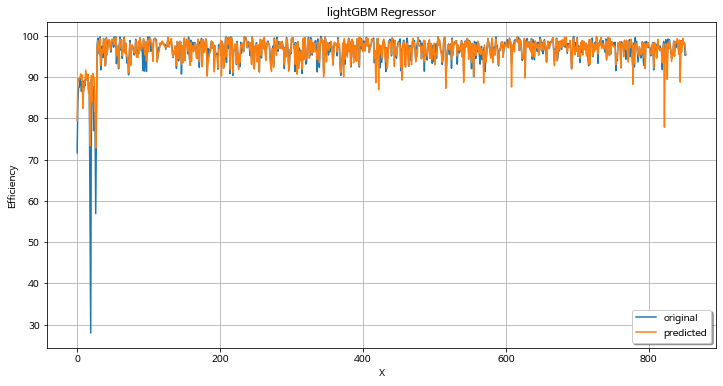

In [ ]:
# visualizing in a plot
x_ax = range(len(YdfTest))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, YdfTest, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("lightGBM Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

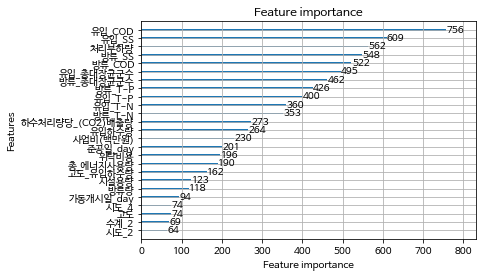

In [ ]:
# plotting feature importance
lgb.plot_importance(model,max_num_features=25)

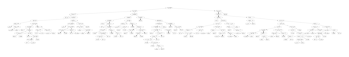

In [ ]:
lgb.plot_tree(model, ax=None, tree_index=0, figsize=None,  show_info=None, precision=3)

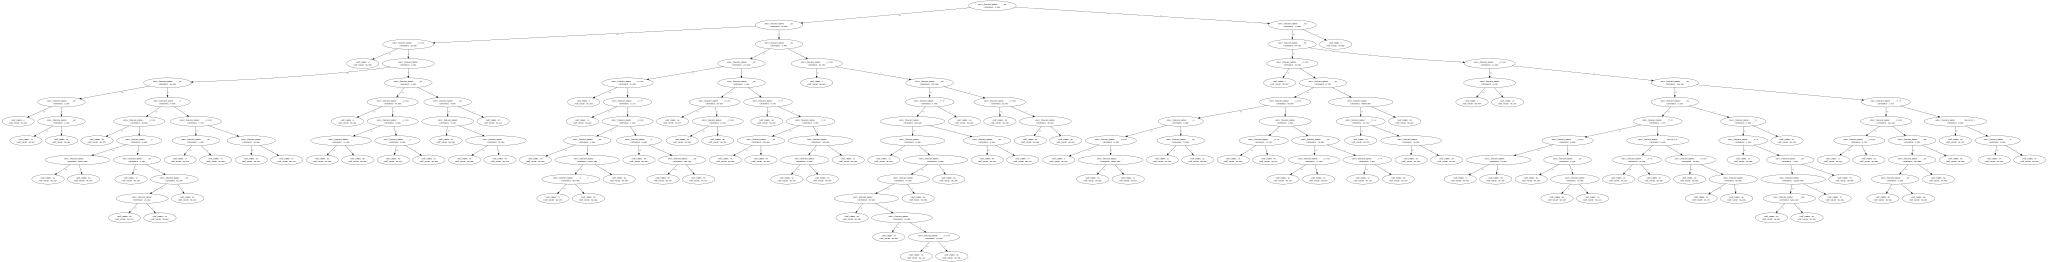

In [ ]:
lgb.create_tree_digraph(model, tree_index=0, show_info=None, precision=3)

# **SMOTE**

In [ ]:
dfSmote = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/SMOTE.csv',encoding='utf-8',)
XSmote = dfSmote.drop(['처리효율'],axis = 1)
YSmote = dfSmote['처리효율']

In [ ]:
# laoding data
lgb_train = lgb.Dataset(XSmote, YSmote)
lgb_eval = lgb.Dataset(XdfTest, YdfTest, reference=lgb_train)

In [ ]:
# fitting the model
model = lgb.train(params, valid_sets=lgb_eval,
                 early_stopping_rounds=50,
                 train_set=lgb_train)

[1]	valid_0's l2: 68.2471
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's l2: 57.0916
[3]	valid_0's l2: 48.2171
[4]	valid_0's l2: 41.0182
[5]	valid_0's l2: 35.3682
[6]	valid_0's l2: 30.6763
[7]	valid_0's l2: 26.9864
[8]	valid_0's l2: 23.9074
[9]	valid_0's l2: 21.416
[10]	valid_0's l2: 19.6055
[11]	valid_0's l2: 17.597
[12]	valid_0's l2: 16.0318
[13]	valid_0's l2: 14.8864
[14]	valid_0's l2: 13.7784
[15]	valid_0's l2: 12.9371
[16]	valid_0's l2: 12.2156
[17]	valid_0's l2: 11.6273
[18]	valid_0's l2: 11.1427
[19]	valid_0's l2: 10.7428
[20]	valid_0's l2: 10.379
[21]	valid_0's l2: 10.0813
[22]	valid_0's l2: 9.7888
[23]	valid_0's l2: 9.58222
[24]	valid_0's l2: 9.37894
[25]	valid_0's l2: 9.1957
[26]	valid_0's l2: 9.07988
[27]	valid_0's l2: 9.03001
[28]	valid_0's l2: 8.9264
[29]	valid_0's l2: 8.84515
[30]	valid_0's l2: 8.76823
[31]	valid_0's l2: 8.7049
[32]	valid_0's l2: 8.61029
[33]	valid_0's l2: 8.5316
[34]	valid_0's l2: 8.48529
[35]	valid_0's l2: 8.46677
[36]	valid

In [ ]:
# prediction
Y_pred = model.predict(XdfTest)

# accuracy check
mse = mean_squared_error(YdfTest, Y_pred)
rmse = mse**(0.5)
rsquare = r2_score(YdfTest, Y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print("R^2: %.2f" % rsquare) 

MSE: 7.96
RMSE: 2.82
R^2: 0.55


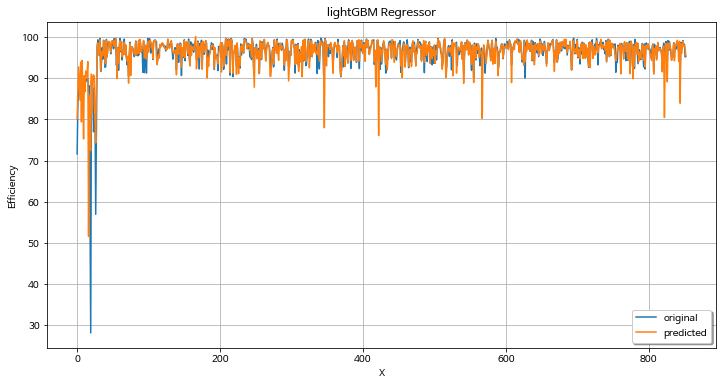

In [ ]:
# visualizing in a plot
x_ax = range(len(YdfTest))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, YdfTest, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("lightGBM Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

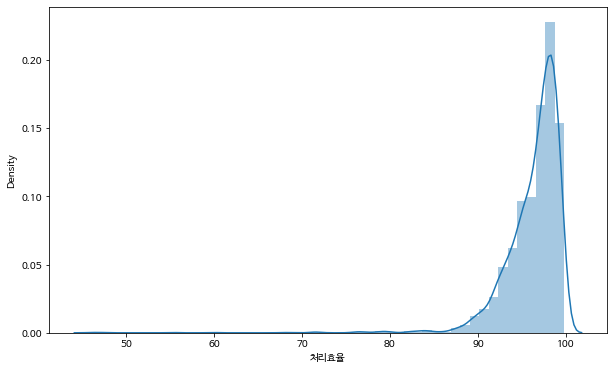

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(dfTrain['처리효율'])

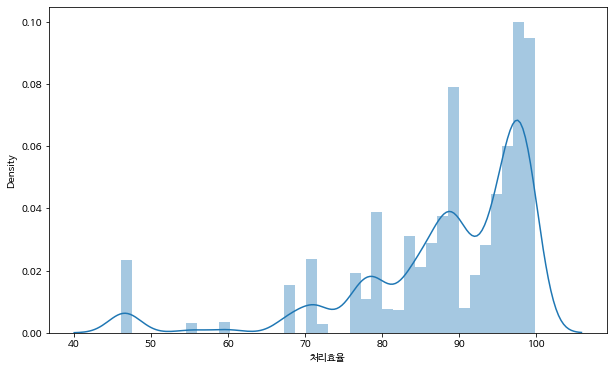

In [ ]:
f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(dfSmote['처리효율'])